In [5]:
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
import seaborn
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('updated_pollution_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


### Description of parameters
- Temperature (°C): Average temperature of the region.
- Humidity (%): Relative humidity recorded in the region.
- PM2.5 Concentration (µg/m³): Fine particulate matter levels.
- PM10 Concentration (µg/m³): Coarse particulate matter levels.
- NO2 Concentration (ppb): Nitrogen dioxide levels.
- SO2 Concentration (ppb): Sulfur dioxide levels.
- CO Concentration (ppm): Carbon monoxide levels.
- Proximity to Industrial Areas (km): Distance to the nearest industrial zone.
- Population Density (people/km²): Number of people per square kilometer in the region
### Air Quality Levels
* Good: Clean air with low pollution levels.
* Moderate: Acceptable air quality but with some pollutants present.
* Poor: Noticeable pollution that may cause health issues for sensitive groups.
* Hazardous: Highly polluted air posing serious health risks to the population.

In [7]:
encoder = LabelEncoder()
df['Air Quality'] = encoder.fit_transform(df['Air Quality'])
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,2
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0


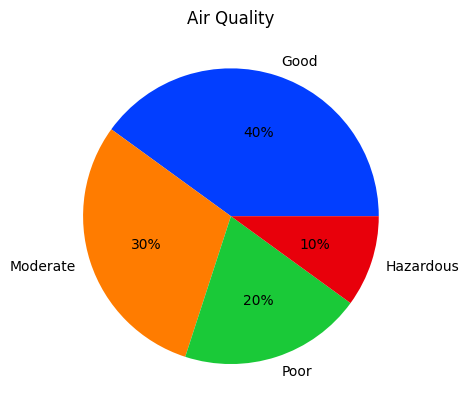

In [8]:
air_quality=df['Air Quality'].value_counts()
palette_color = seaborn.color_palette('bright') #Seaborn paleta boja 
plt.pie(air_quality.values, labels=encoder.inverse_transform(air_quality.index), colors=palette_color, autopct='%.0f%%')
plt.title("Air Quality") 
plt.show() 

<Axes: >

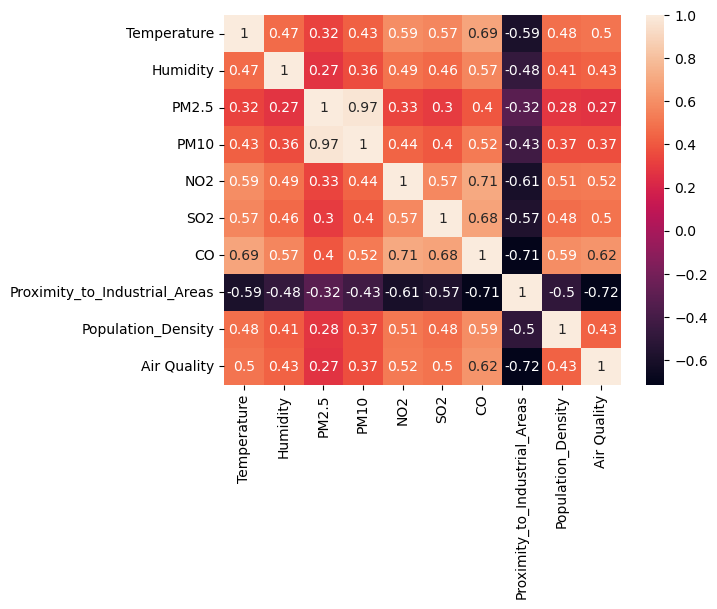

In [36]:
correlation=df.corr()
seaborn.heatmap(correlation,annot=True)

30.03 29.0
70.06 69.8
20.14 12.0
30.22 21.7
26.41 25.3
10.01 8.0
1.5 1.41
8.43 7.9
497.42 494.0


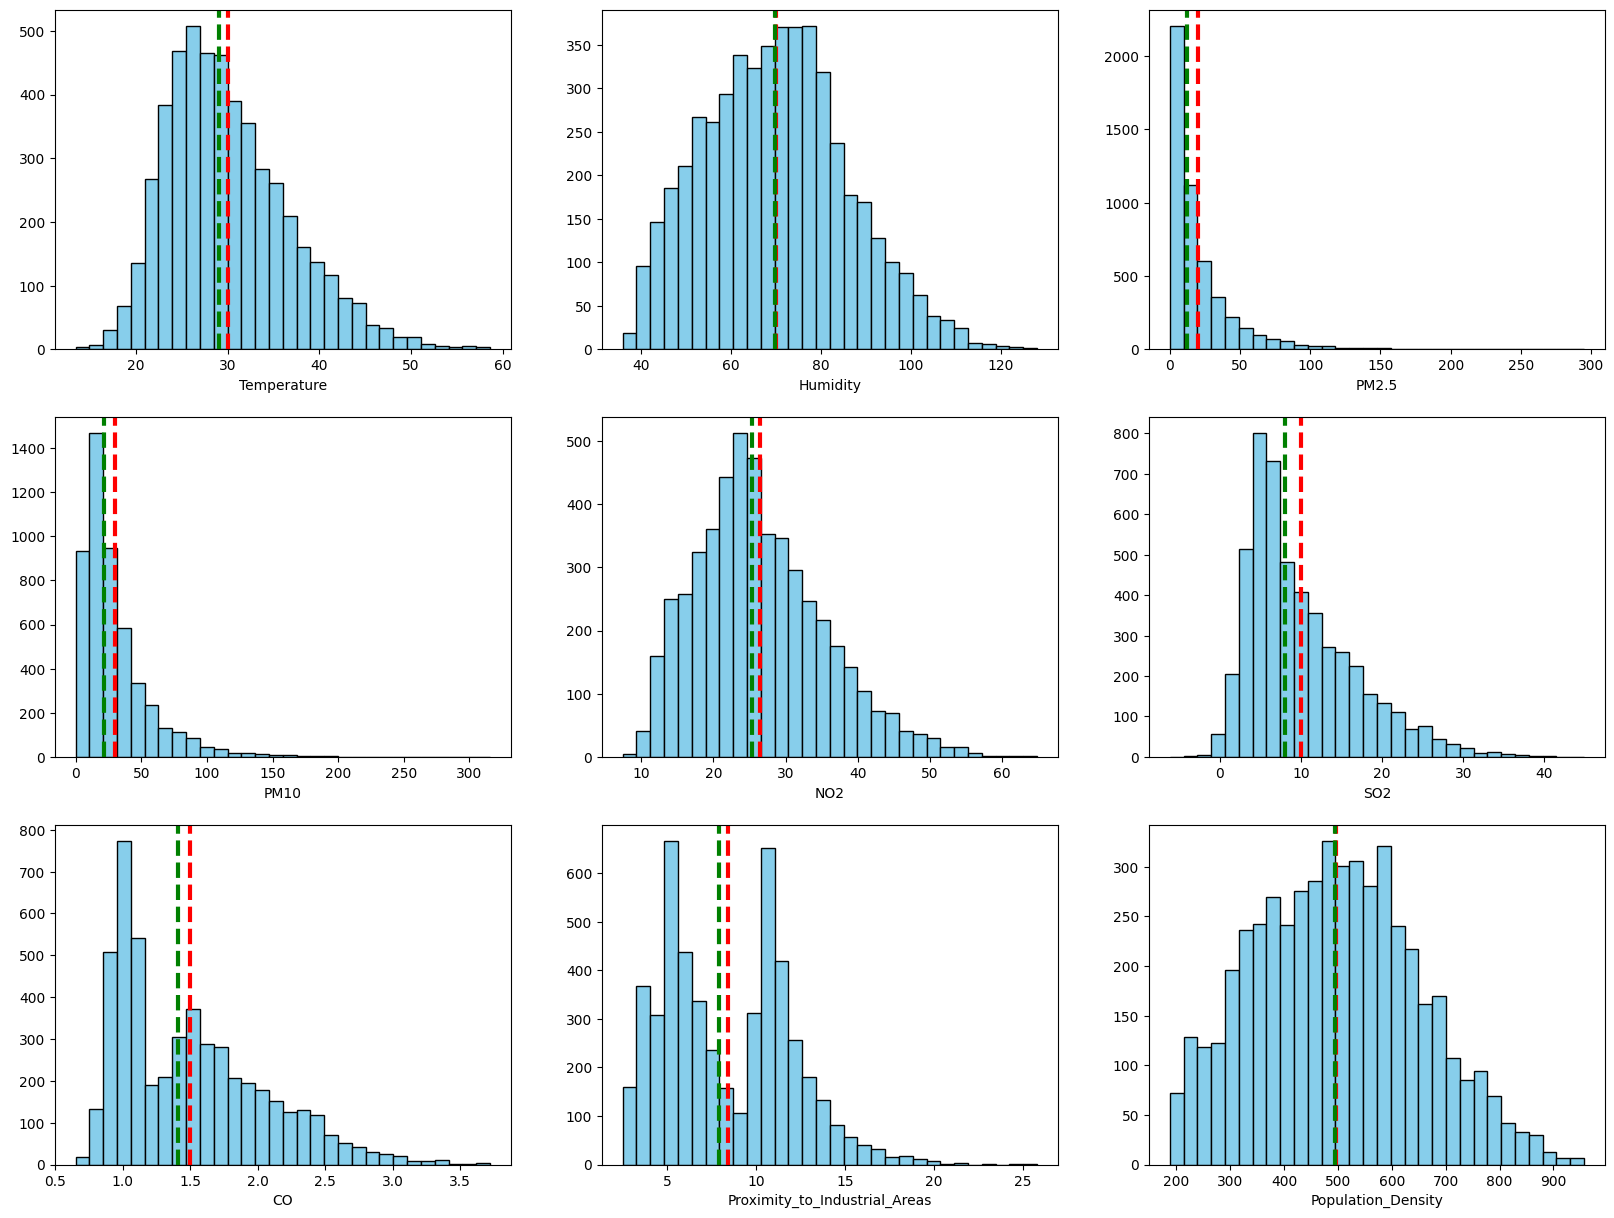

In [20]:
df_simpl=df.drop(columns='Air Quality')
plt.figure(figsize=(20,15))
for ind,col in enumerate(df_simpl.columns):
    print(np.round(df[col].mean(),2),df[col].median())
    plt.subplot(3,3,ind+1)
    plt.hist(df_simpl[col], bins=30, color='skyblue', edgecolor='black')
    plt.axvline(np.round(df[col].mean(),2), color='r', linestyle='dashed', linewidth=3)
    plt.axvline(np.round(df[col].median(),2), color='g', linestyle='dashed', linewidth=3)
    plt.xlabel(col)
plt.show()

In [19]:
print(np.where(df['PM10']>250))
print(df['PM10'][np.where(df['PM10']>250)[0]])

(array([ 114, 3827]),)
114     261.5
3827    315.8
Name: PM10, dtype: float64


In [10]:
for col in df.columns:
    if df[col].dtypes!=object:
        print(f"{col} mean:{np.round(df[col].mean(),2)}, median:{df[col].median()}")
print("Air quality categories distribution",df['Air Quality'].value_counts().to_dict())

Temperature mean:30.03, median:29.0
Humidity mean:70.06, median:69.8
PM2.5 mean:20.14, median:12.0
PM10 mean:30.22, median:21.7
NO2 mean:26.41, median:25.3
SO2 mean:10.01, median:8.0
CO mean:1.5, median:1.41
Proximity_to_Industrial_Areas mean:8.43, median:7.9
Population_Density mean:497.42, median:494.0
Air Quality mean:1.3, median:1.5
Air quality categories distribution {0: 2000, 2: 1500, 3: 1000, 1: 500}


In [3]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


# Nastavak 

In [6]:
minmax_scale=preprocessing.MinMaxScaler(feature_range=(0,1))
df_minmax=df.copy()
for col in df.columns:
    if df[col].dtypes!=object:
        df_minmax[col]=minmax_scale.fit_transform(df[col].values.reshape(-1,1))
print(df_minmax.head())

   Temperature  Humidity     PM2.5      PM10       NO2       SO2        CO  \
0     0.362832  0.250814  0.017627  0.057278  0.200000  0.301370  0.348534   
1     0.329646  0.429967  0.007797  0.039241  0.406957  0.311155  0.322476   
2     0.214602  0.420195  0.090508  0.107595  0.295652  0.367906  0.319218   
3     0.303097  0.033659  0.020678  0.020570  0.106087  0.225049  0.162866   
4     0.289823  0.376764  0.023390  0.051266  0.252174  0.230920  0.117264   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                       0.163090            0.170351    Moderate  
1                       0.150215            0.550065    Moderate  
2                       0.115880            0.560468    Moderate  
3                       0.369099            0.472042        Good  
4                       0.437768            0.149545        Good  


In [7]:
scaller=preprocessing.StandardScaler()
df_std=df.copy()
for col in df.columns:
    if df[col].dtypes!=object:
        df_std[col]=scaller.fit_transform(df[col].values.reshape(-1,1))
print(df_std.head())

   Temperature  Humidity     PM2.5      PM10       NO2       SO2        CO  \
0    -0.034080 -0.690715 -0.608589 -0.450455 -0.844581 -0.120721  0.402303   
1    -0.257295  0.349507 -0.726706 -0.658892  0.493329 -0.046643  0.255775   
2    -1.031106  0.292768  0.267100  0.130973 -0.226219  0.383011  0.237459   
3    -0.435867 -1.951591 -0.571933 -0.874642 -1.451700 -0.698530 -0.641707   
4    -0.525153  0.040593 -0.539349 -0.519934 -0.507293 -0.654083 -0.898130   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                      -0.588658           -1.168163    Moderate  
1                      -0.671748            0.743598    Moderate  
2                      -0.893318            0.795975    Moderate  
3                       0.740767            0.350770        Good  
4                       1.183909           -1.272917        Good  
